In [ ]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# =========================
# Синтетичні дані
# =========================
np.random.seed(42)

n_patients = 100

# Генеруємо час до події (days_in_hospital)
# Експоненційний розподіл, щоб пацієнти мали різні дні перебування
days_in_hospital = np.random.exponential(scale=20, size=n_patients)
days_in_hospital = np.ceil(days_in_hospital)  # округляємо до днів

# Генеруємо подію: 1 = виписка, 0 = ще в лікарні (цензура)
discharged = np.random.binomial(1, 0.8, size=n_patients)  # ~20% цензури

# Створюємо DataFrame
data = pd.DataFrame({
    'patient_id': range(1, n_patients + 1),
    'days_in_hospital': days_in_hospital,
    'discharged': discharged
})
data

,patient_id,days_in_hospital,discharged
0,1,10.0,1
1,2,61.0,1
2,3,27.0,1
3,4,19.0,1
4,5,4.0,0
...,...,...,...
95,96,14.0,1
96,97,15.0,1
97,98,12.0,0
98,99,1.0,0


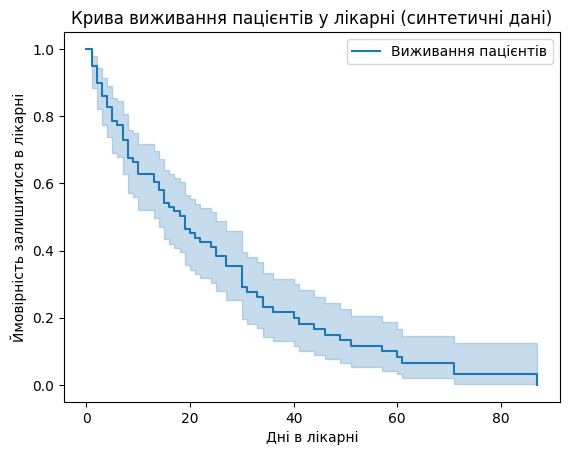

In [ ]:
# =========================
# Kaplan-Meier
# =========================
kmf = KaplanMeierFitter()
kmf.fit(durations=data['days_in_hospital'], event_observed=data['discharged'], label='Виживання пацієнтів')

# Побудова кривої виживання
kmf.plot_survival_function()
plt.title("Крива виживання пацієнтів у лікарні (синтетичні дані)")
plt.xlabel("Дні в лікарні")
plt.ylabel("Ймовірність залишитися в лікарні")
plt.show()

In [9]:
# Ймовірність "виживання" до 40 днів
survival_prob = kmf.survival_function_at_times(40)
print(survival_prob)

40    0.199204
Name: Виживання пацієнтів, dtype: float64


# порівняння груп за виживанням

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# =========================
# Створюємо синтетичні дані
# =========================
# 1000 зразків, 2 інформативні ознаки
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

data = pd.DataFrame(X, columns=['feature1', 'feature2'])
# y використаємо як групу A/B
data['group'] = np.where(y == 0, 'A', 'B')

# Генеруємо "час до події" (days_in_hospital)
# Основна ідея: група B швидше виписується
np.random.seed(42)
data['days_in_hospital'] = np.where(
    data['group'] == 'A',
    np.random.exponential(scale=20, size=len(data)),  # довше для групи A
    np.random.exponential(scale=15, size=len(data))   # швидше для групи B
)
data['days_in_hospital'] = np.ceil(data['days_in_hospital'])  # округляємо до днів

# Генеруємо цензуровані дані: приблизно 20% цензури
data['discharged'] = np.random.binomial(1, 0.8, size=len(data))  # 1 = подія, 0 = цензуровано
data


,feature1,feature2,group,days_in_hospital,discharged
0,1.228312,-0.757178,A,10.0,1
1,0.698409,-1.380295,A,61.0,1
2,2.548817,2.502258,B,6.0,1
3,0.573579,-1.352979,A,19.0,0
4,0.585900,-1.337457,A,4.0,1
...,...,...,...,...,...
95,0.473358,-1.438620,A,14.0,1
96,1.233323,1.239336,B,20.0,1
97,0.460109,-1.487396,A,12.0,1
98,0.679631,0.757837,B,33.0,1


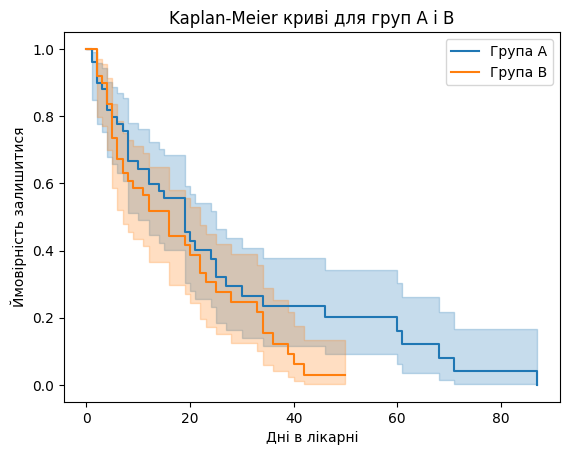

In [11]:

# =========================
# Kaplan-Meier для двох груп
# =========================
kmf = KaplanMeierFitter()

group1 = data[data['group'] == 'A']
group2 = data[data['group'] == 'B']

ax = None
kmf.fit(group1['days_in_hospital'], group1['discharged'], label='Група A')
ax = kmf.plot_survival_function()

kmf.fit(group2['days_in_hospital'], group2['discharged'], label='Група B')
kmf.plot_survival_function(ax=ax)

plt.title("Kaplan-Meier криві для груп A і B")
plt.xlabel("Дні в лікарні")
plt.ylabel("Ймовірність залишитися")
plt.show()


# параметрична модель Кокса

In [12]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# =========================
# Синтетичні дані
# =========================
np.random.seed(42)
n_patients = 100
n_features = 4

# Генеруємо незалежні ознаки
data = pd.DataFrame(np.random.normal(size=(n_patients, n_features)),
                    columns=[f'feature_{i+1}' for i in range(n_features)])

# Час до події
data['days_in_hospital'] = np.ceil(np.random.exponential(scale=20, size=n_patients))

# Цензура: ~20% пацієнтів ще в лікарні
data['discharged'] = np.random.binomial(1, 0.8, size=n_patients)
data

,feature_1,feature_2,feature_3,feature_4,days_in_hospital,discharged
0,0.496714,-0.138264,0.647689,1.523030,11.0,1
1,-0.234153,-0.234137,1.579213,0.767435,7.0,1
2,-0.469474,0.542560,-0.463418,-0.465730,2.0,1
3,0.241962,-1.913280,-1.724918,-0.562288,41.0,1
4,-1.012831,0.314247,-0.908024,-1.412304,34.0,1
...,...,...,...,...,...,...
95,-0.839722,-0.599393,-2.123896,-0.525755,5.0,1
96,-0.759133,0.150394,0.341756,1.876171,10.0,1
97,0.950424,-0.576904,-0.898415,0.491919,14.0,1
98,-1.320233,1.831459,1.179440,-0.469176,20.0,1


<lifelines.CoxPHFitter: fitted with 100 total observations, 16 right-censored observations>
             duration col = 'days_in_hospital'
                event col = 'discharged'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 100
number of events observed = 84
   partial log-likelihood = -304.99
         time fit was run = 2026-01-23 19:59:33 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
feature_1  -0.02       0.98       0.12            -0.25             0.22                 0.78                 1.24
feature_2   0.13       1.14       0.10            -0.07             0.33                 0.94                 1.39
feature_3   0.10       1.11       0.11            -0.10             0.31                 0.90                 1.36
feature_4   0.20       1.22       0.11            -0.02             0.41                 0.98                 1.51

            cmp to     z    p   -log2(p)
covariate                               
feature_1     0.00 -0.15 0.88       0.18
feature_2     0.00  1.30 0.19       2.37
feature_3     0.00  0.98 0.33       1.61
feature_4     0.00  1.81 0.07       3.82
---
Concordance = 0.59
Partial AIC = 617.97
log-likelihood ratio test = 6.56 on 4 df
-log2(p) of ll-ratio test = 2.63

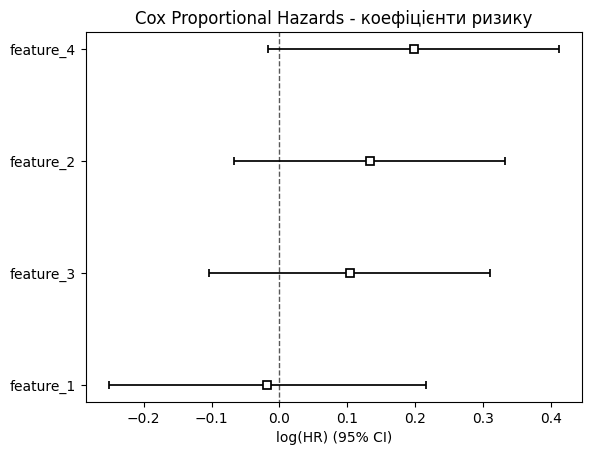

In [13]:
# =========================
# Cox Proportional Hazards
# =========================
cph = CoxPHFitter(penalizer=0.1)  # регуляризація для уникнення проблем з колінеарністю
cph.fit(data, duration_col='days_in_hospital', event_col='discharged')

# Вивід результатів
cph.print_summary()

# =========================
# Графік коефіцієнтів ризику
# =========================
cph.plot()
plt.title("Cox Proportional Hazards - коефіцієнти ризику")
plt.show()

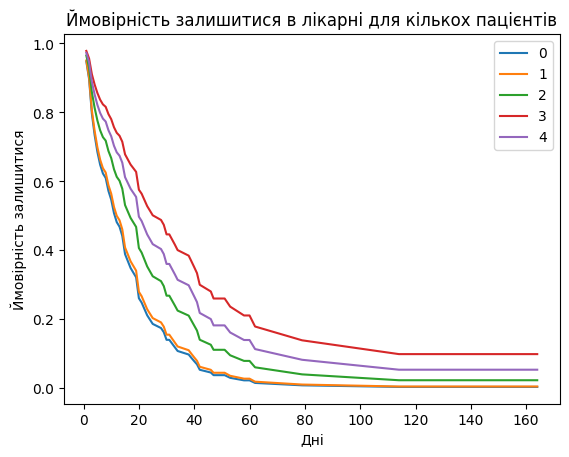

In [14]:
# Створюємо кілька пацієнтів
n_features = 4
n_patients = 5  # кількість пацієнтів

# Створюємо DataFrame з випадковими значеннями ознак
np.random.seed(42)  # для відтворюваності
new_patients = pd.DataFrame(
    np.random.normal(loc=0, scale=1, size=(n_patients, n_features)),
    columns=[f'feature_{i+1}' for i in range(n_features)]
)

# Прогноз виживання
surv_funcs = cph.predict_survival_function(new_patients)

# Побудова кривих для всіх пацієнтів
surv_funcs.plot()
plt.title("Ймовірність залишитися в лікарні для кількох пацієнтів")
plt.xlabel("Дні")
plt.ylabel("Ймовірність залишитися")
plt.show()